#  <span style="color:orange">自然语言处理教程 (NLP101) - 初级</span>

**使用版本: PyCaret 2.0** <br />
**更新时间: 2020年8月24**

# 1.0 教程简介
欢迎阅读自然语言处理的初级教程**(NLP101)**. 本教程使用`pycaret.nlp`模块来介绍自然处理的基本操作，面向的读者是PyCaret的新手。

在本教程中你会学到:


* **获取数据:** 如何从PyCaret中获取数据？
* **环境搭建:** 如何搭建自然处理所需的必要环境并且进行必须的文字预处理？
* **创建模型:** 如何创建NLP模型？
* **使用模型:** 如何使用训练好的模型给文档/文本分配主题？
* **模型性能图:** 如何使用多种图像来分析模型的性能？
* **保存/加载模型:**  如何保存/加载模型以便之后使用？

阅读时间 : 大约30分钟


# 1.1 安装 PyCaret
安装PyCaret一般只需要几分钟。请按照以下说明进行操作。

# 在本地 Jupyter Notebook 安装 PyCaret
`pip install pycaret`  <br />

# 在 Google Colab 或者 Azure Notebooks 安装 PyCaret
`!pip install pycaret`


# 1.2 预先要求
- Python 3.6 或更高
- PyCaret 2.0 或更高
- 网络链接来获取PyCaret中的数据
- 异常检测的基础知识

# 1.3 Google Colab 用户:
如何你在 Google Colab跑这个Notebook, 请运行以下代码来显示交互式的图像。<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

# 1.4 其他阅读资料:
- __[Natural Language Processing Tutorial (NLP102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Intermediate%20-%20NLP102.ipynb)__
- __[Natural Language Processing Tutorial (NLP103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Expert%20-%20NLP103.ipynb)__

# 2.0 什么是自然语言处理？

自然语言处理（简称 NLP）是人工智能的一个分支，它处理分析、理解和生成人类自然使用的语言，以便使用自然人类语言而不是计算机语言在书面和口语环境中与计算机交互。 NLP 在机器学习中的一些常见用例是：

- **主题发现和建模:** 捕捉文本集合中的含义和主题，并应用主题建模等高级建模技术将相似的文档组合在一起。
- **情绪分析:** 识别大量文本中的情绪或主观意见，包括平均情绪和意见挖掘。
- **文件摘要:** 自动生成大量文本的概要。
- **语音到文本和文本到语音的转换:** 将语音命令转换为书面文本，反之亦然。
- **机器翻译:** 将文本或语音从一种语言自动翻译成另一种语言。

__[更多资料](https://en.wikipedia.org/wiki/Natural_language_processing)__

# 3.0 Overview of Natural Language Processing Module in PyCaret
PyCaret's NLP module (`pycaret.nlp`) is an unsupervised machine learning module which can be used for analyzing the text data by creating topic model to find hidden semantic structure in documents. PyCaret's NLP module comes built-in with a wide range of text pre-processing techniques which is the fundamental step in any NLP problem. It transforms the raw text into a format that machine learning algorithms can learn from.

As of first release, PyCaret's NLP module only support `English` language and provides several popular implementation of topic models from Latent Dirichlet Allocation to Non-Negative Matrix Factorization. It has over 5 ready-to-use algorithms and over 10 plots to analyze the text. PyCaret's NLP module also implements a unique function `tune_model()` that allows you to tune the hyperparameters of a topic model to optimize the supervised learning objective such as `AUC` for classification or `R2` for regression.

# 4.0 Dataset for the Tutorial

For this tutorial we will be using data from **Kiva Microfunds** https://www.kiva.org/. Kiva Microfunds is a non-profit that allows individuals to lend money to low-income entrepreneurs and students around the world. Since starting in 2005, Kiva has crowd-funded millions of loans with a repayment rate of around 98%. At Kiva, each loan request includes both traditional demographic information on the borrower, such as gender and location, as well as a personal story. In this tutorial we will use the text given in personal story to gain insights of the dataset and understand hidden semantic structure in the text. The dataset contains 6,818 samples. Short description of features are below:

- **country:** country of borrower
- **en:** Personal story of borrower when applied for loan
- **gender:** Gender (M=male, F=female)
- **loan_amount:** Amount of loan approved and disbursed
- **nonpayment:** Type of lender (Lender = personal registered user on Kiva website, Partner = microfinance institution who work with Kiva to find and fund loans)
- **sector:** sector of borrower
- **status:** status of loan (1-default, 0-repaid)

In this tutorial we will only use `en` column to create topic model. In next tutorial __[Natural Language Processing (NLP102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Intermediate%20-%20NLP102.ipynb)__ we will use topic model to build a classifier that predicts `status` of loan to know whether the applicant will default or not. 

# Dataset Acknowledgement:
Kiva Microfunds https://www.kiva.org/ 

# 5.0 Getting the Data

You can download the data from PyCaret's git repository __[Click Here to Download](https://github.com/pycaret/pycaret/blob/master/datasets/kiva.csv)__ or you can load it using `get_data()` function (This will require internet connection).

In [1]:
from pycaret.datasets import get_data
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [2]:
#check the shape of data
data.shape

(6818, 7)

In [3]:
# sampling the data to select only 1000 documents
data = data.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 7)

# 6.0 Setting up Environment in PyCaret

`setup()` function initializes the environment in pycaret and performs several text pre-processing steps that are imperative to work with NLP problems. setup must be called before executing any other function in pycaret. It takes two parameters: pandas dataframe and name of the text column passed as `target` parameter. You can also pass a `list` containing text, in which case you don't need to pass `target` parameter. When setup is executed, following pre-processing steps are applied automatically:

- **Removing Numeric Characters:** All numeric characters are removed from the text. They are replaced with blanks.<br/>
<br/>
- **Removing Special Characters:** All non-alphanumeric special characters are removed from the text. They are also replaced with blanks.<br/>
<br/>
- **Word Tokenization:** Word tokenization is the process of splitting a large sample of text into words. This is the core requirement in natural language processing tasks where each word needs to be captured separately for further analysis. __[Read More](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)__ <br/>
<br/> 
- **Stopword Removal:** A stop word (or stopword) is a word that is often removed from text because it is common and provides little value for information retrieval, even though it might be linguistically meaningful. Example of such words in english language are: "the", "a", "an", "in" etc. __[Read More](https://en.wikipedia.org/wiki/Stop_words)__ <br/>
<br/>
- **Bigram Extraction:** A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. For example: word New York is captured as two different words "New" and "York" when tokenization is performed but if it is repeated enough times, Bigram Extraction will represent the word as one i.e. "New_York"  __[Read More](https://en.wikipedia.org/wiki/Bigram)__ <br/>
<br/>
- **Trigram Extraction:** Similar to bigram extraction, trigram is a sequence of three adjacent elements from a string of tokens. __[Read More](https://en.wikipedia.org/wiki/Trigram)__ <br/>
<br/>
- **Lemmatizing:** Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word. __[Read More](https://en.wikipedia.org/wiki/Lemmatisation)__ <br/>
<br/>
- **Custom Stopwords:** Many times text contains words that are not stopwords by the rule of language but they add no or very little information. For example, in this tutorial we are using the loan dataset. As such, words like "loan", "bank", "money", "business" are too obvious and adds no value. More often than not, they also add a lot of noise in the topic model. You can remove those words from corpus by using `custom_stopwords` parameter. In next tutorial, __[Natural Language Processing Tutorial (NLP102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Intermediate%20-%20NLP102.ipynb)__ we will demonstrate the use of `custom_stopwords` parameter inside `setup()`. <br/>
<br/>

**Note :** Some functionalities in `pycaret.nlp` requires english language model. The language model is not downloaded automatically when you install pycaret. You will have to download these python command line interface such as Anaconda Prompt. To download the model, please type the following in your command line:

`python -m spacy download en_core_web_sm` <br/>
`python -m textblob.download_corpora` <br/>

In [5]:
from pycaret.nlp import *
exp_nlp101 = setup(data = data, target = 'en', session_id = 123)

Description,Value
session_id,123
Documents,1000
Vocab Size,4573
Custom Stopwords,False


Once the setup is successfully executed it prints the information grid with the following information: 

- **session_id :**  A pseduo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id is set as `123` for later reproducibility.<br/>
<br/>
- **# Documents :** Number of documents (or samples in dataset if dataframe is passed). <br/>
<br/>
- **Vocab Size :** Size of vocabulary in the corpus after applying all text pre-processing such as removal of stopwords, bigram/trigram extraction, lemmatization etc. <br/>

Notice that all text pre-processing steps are performed automatically when you execute `setup()`. These steps are imperative to perform any NLP experiment. `setup()` function prepares the corpus and dictionary that is ready-to-use for the topic models that you can create using `create_model()` function. Another way to pass the text is in the form of list in which case no `target` parameter is needed.

# 7.0 Create a Topic Model

**What is Topic Model?** In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is. __[Read More](https://en.wikipedia.org/wiki/Topic_model)__

Creating a topic model in PyCaret is simple and similar to how you would have created a model in supervised modules of pycaret. A topic model is created using `create_model()` function which takes one mandatory parameter i.e. name of model as a string. This function returns a trained model object. There are 5 topic models available in PyCaret. see the docstring of `create_model()` for complete list of models. See an example below where we create Latent Dirichlet Allocation (LDA) model:

In [14]:
lda = create_model('lda')

In [15]:
print(lda)

LdaModel(num_terms=4573, num_topics=4, decay=0.5, chunksize=100)


We have created Latent Dirichlet Allocation (LDA) model with just one word i.e. `create_model()`. Notice the `num_topics` parameter is set to `4` which is a default value taken when you donot pass `num_topics` parameter in `create_model()`. In below example, we will create LDA model with 6 topics and we will also set `multi_core` parameter to `True`. When `multi_core` is set to `True` Latent Dirichlet Allocation (LDA) uses all CPU cores to parallelize and speed up model training.

In [16]:
lda2 = create_model('lda', num_topics = 6, multi_core = True)

In [17]:
print(lda2)

LdaModel(num_terms=4573, num_topics=6, decay=0.5, chunksize=100)


# 8.0 Assign a Model

Now that we have created a topic model, we would like to assign the topic proportions to our dataset (6818 documents / samples) to analyze the results. We will achieve this by using `assign_model()` function. See an example below:

In [18]:
lda_results = assign_model(lda)
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry child primary school train tailo...,F,75,partner,Services,0,0.001872,0.006235,0.990371,0.001521,Topic 2,0.99
1,Kenya,practitioner run year old life wife child biol...,M,1200,partner,Health,0,0.262538,0.129088,0.606908,0.001466,Topic 2,0.61
2,Dominican Republic,live child boy girl range year sell use clothi...,F,150,partner,Clothing,0,0.002032,0.218908,0.777409,0.001651,Topic 2,0.78
3,Kenya,phanice marry child daughter secondary school ...,F,150,lender,Services,1,0.002075,0.070739,0.925500,0.001686,Topic 2,0.93
4,Kenya,year old hotel kaptembwa operating hotel last ...,F,300,lender,Food,1,0.001838,0.097333,0.899336,0.001493,Topic 2,0.90


Notice how 6 additional columns are now added to the dataframe. `en` is the text after all pre-processing. `Topic_0 ... Topic_3` are the topic proportions and represents the distribution of topics for each document. `Dominant_Topic` is the topic number with highest proportion and `Perc_Dominant_Topic` is the percentage of dominant topic over 1 (only shown when models are stochastic i.e. sum of all proportions equal to 1) .

# 9.0 Plot a Model

`plot_model()` function can be used to analyze the overall corpus or only specific topics extracted through topic model. Hence the function `plot_model()` can also work without passing any trained model object. See examples below:

# 9.1 Frequency Distribution of Entire Corpus

In [19]:
plot_model()

# 9.2 Top 100 Bigrams on Entire Corpus

In [20]:
plot_model(plot = 'bigram')

# 9.3 Frequency Distribution of Topic 1

`plot_model()` can also be used to analyze the same plots for specific topics. To generate plots at topic level, function requires trained model object to be passed inside `plot_model()`. In example below we will generate frequency distribution on `Topic 1` only as defined by `topic_num` parameter.

In [21]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

# 9.4 Topic Distribution

In [22]:
plot_model(lda, plot = 'topic_distribution')

Each document is a distribution of topics and not a single topic. Although, if the task is of categorizing document into specific topics, it wouldn't be wrong to use the topic proportion with highest value to categorize the document into **a topic**. In above plot, each document is categorized into one topic using the largest proportion of topic weights. We can see most of the documents are in `Topic 3` with only few in `Topic 1`. If you hover over these bars, you will get basic idea of themes in this topic by looking at the keywords. For example if you evaluate `Topic 2`, you will see keywords words like 'farmer', 'rice', 'land', which probably means that the loan applicants in this category pertains to agricultural/farming loans. However, if you hover over `Topic 0` and `Topic 3` you will observe lot of repitions and keywords are overlapping in all topics such as word "loan" and "business" appears both in `Topic 0` and `Topic 3`. In next tutorial, __[Natural Language Processing Tutorial (NLP102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/Tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Intermediate%20-%20NLP102.ipynb)__ we will demonstrate the use of `custom_stopwords` at which point we will re-analyze this plot.

# 9.5 T-distributed Stochastic Neighbor Embedding (t-SNE)

In [23]:
plot_model(lda, plot = 'tsne')

T-distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. 

__[Learn More](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)__

# 9.6 Uniform Manifold Approximation and Projection Plot

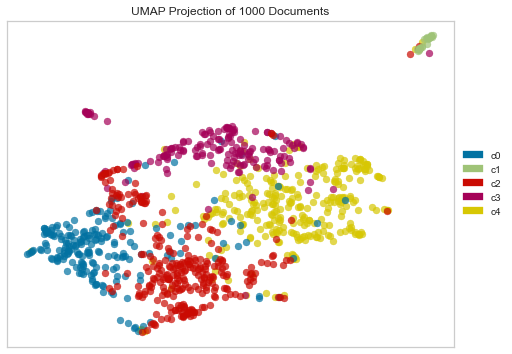

In [24]:
plot_model(lda, plot = 'umap')

UMAP (Uniform Manifold Approximation and Projection) is a novel manifold learning technique for dimensionality reduction. It is similar to tSNE and PCA in its purpose as all of them are techniques to reduce dimensionality for 2d/3d projections. UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology. 

__[Learn More](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668)__

# 10.0 Evaluate Model

Another way to analyze performance of models is to use `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. See below example where we have generated Sentiment Polarity Plot for `Topic 3` using LDA model stored in `lda` variable.

In [25]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

# 11.0 Saving the model

As you get deeper into Natural Language Processing, you will learn that training time of topic models increases exponentially as the size of corpus increases. As such, if you would like to continue your experiment or analysis at a later point, you don't need to repeat the entire experiment and re-train your model. PyCaret inbuilt function `save_model()` allows you to save the model for later use.

In [26]:
save_model(lda,'Final LDA Model 08Feb2020')

Model Succesfully Saved


# 12.0 Loading the model

To load a saved model on a future date in the same or different environment, we would use the PyCaret's `load_model()` function.

In [27]:
saved_lda = load_model('Final LDA Model 08Feb2020')

Model Sucessfully Loaded


In [28]:
print(saved_lda)

LdaModel(num_terms=4573, num_topics=4, decay=0.5, chunksize=100)


# 13.0 Wrap-up / Next Steps?

What we have covered in this tutorial is the entire workflow for Natural Language Processing experiment. Our task today was to create and analyze a topic model. We have performed several text pre-processing steps using `setup()` then we have created a topic model using `create_model()`, assigned topics to the dataset using `assign_model()` and analyze the results using `plot_model()`. All this was completed in less than 10 commands that are naturally constructed and very intuitive to remember. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code.

In this tutorial, we have only covered basics of `pycaret.nlp`. In the next tutorial we will demonstrate the use of `tune_model()` to automatically select the number of topics for a topic model. We will also go deeper into few concepts and techniques such as `custom_stopwords` to improve the result of a topic model. 

See you at the next tutorial. Follow the link to __[Natural Language Processing (NLP102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Natural%20Language%20Processing%20Tutorial%20Level%20Intermediate%20-%20NLP102.ipynb)__